In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
df_house = pd.read_csv('../data/train.csv', index_col=0)
df_house_test = pd.read_csv('../data/test.csv', index_col=0)
df_all = pd.concat((df_house.iloc[:, :-1], df_house_test))

In [3]:
df_all_new = pd.get_dummies(df_all['MSSubClass'].replace([40, 150], 'Other'), prefix='MSSubClass')

In [4]:
cur_var = pd.get_dummies(df_all['MSZoning'].fillna('RL'), prefix='MSZoning')
df_all_new = df_all_new.join(cur_var)

In [5]:
df_all_new['LotFrontage'] = df_all['LotFrontage'].fillna(df_all['LotFrontage'].mean())

In [14]:
df_all_new['LotArea'] = np.log1p(df_all['LotArea'])

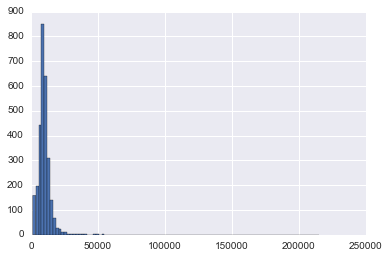

In [11]:
df_all_new['LotArea'].hist(bins=100)

In [15]:
df_all_new['Street'] = 1 * (df_all['Street'] == 'Pave')

In [16]:
cur_var = pd.get_dummies(df_all['Alley'].fillna('None'), prefix='Alley')
df_all_new = df_all_new.join(cur_var)

In [17]:
cur_var = pd.get_dummies(df_all['LotShape'], prefix='LotShape')
df_all_new = df_all_new.join(cur_var)

In [18]:
cur_var = pd.get_dummies(df_all['LandContour'], prefix='LandContour')
df_all_new = df_all_new.join(cur_var)

In [19]:
cur_var = pd.get_dummies(df_all['LotConfig'], 'LotConfig')
df_all_new = df_all_new.join(cur_var)

In [20]:
cur_var = pd.get_dummies(df_all['LandSlope'], 'LandSlope')
df_all_new = df_all_new.join(cur_var)

In [21]:
cur_var = pd.get_dummies(df_all['Neighborhood'], 'Neighborhood')
df_all_new = df_all_new.join(cur_var)

In [22]:
cur_var = pd.get_dummies(df_all['Condition1'], prefix='Condition1')
df_all_new = df_all_new.join(cur_var)

In [23]:
cur_var = pd.get_dummies(df_all['BldgType'], 'BldgType')
df_all_new = df_all_new.join(cur_var)

In [24]:
cur_var = pd.get_dummies(df_all['HouseStyle'], 'HouseStyle')
df_all_new = df_all_new.join(cur_var)

In [25]:
cur_var = pd.get_dummies(df_all['OverallQual'].map(lambda x: 2 if x < 3 else x), 'OverallQual')
df_all_new = df_all_new.join(cur_var)

In [26]:
cur_var = pd.get_dummies(df_all['OverallCond'], 'OverallCond')
df_all_new = df_all_new.join(cur_var)

In [27]:
year_built_new = pd.qcut(df_all['YearBuilt'], 10)
cur_var = pd.get_dummies(year_built_new, 'YearBuilt')
df_all_new = df_all_new.join(cur_var)

In [28]:
year_remod = pd.qcut(df_all['YearRemodAdd'], 5)
cur_var = pd.get_dummies(year_remod, 'YearRemodAdd')
df_all_new = df_all_new.join(cur_var)

In [29]:
# temp = df_all['RoofStyle'].replace(['Mansard', 'Shed'], 'Other')
cur_var = pd.get_dummies(df_all['RoofStyle'], prefix='RoofStyle')
df_all_new = df_all_new.join(cur_var)

In [30]:
cur_var = pd.get_dummies(df_all['RoofMatl'].map(lambda x: 'CompShg' if x == 'CompShg' else 'Tar&Grv' if x == 'Tar&Grv' else 'Other'), 'RoofMatl')
df_all_new = df_all_new.join(cur_var)

In [31]:
temp = df_all['Exterior1st'].replace(['BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc'], 'Other')
temp = temp.fillna('Other')
cur_var = pd.get_dummies(temp, prefix='Exterior1st')
df_all_new = df_all_new.join(cur_var)

In [32]:
temp = df_all['Exterior2nd'].replace(['Brk Cmn', 'AsphShn', 'Stone', 'CBlock'], 'Other')
temp = temp.fillna('Other')
cur_var = pd.get_dummies(temp, prefix='Exterior2nd')
df_all_new = df_all_new.join(cur_var)

In [33]:
cur_var = pd.get_dummies(df_all['MasVnrType'].fillna('None'), prefix='MasVnrType')
df_all_new = df_all_new.join(cur_var)

In [53]:
temp = pd.cut(df_all['MasVnrArea'].fillna(0), [-1,0, 100, 200, 300, 500, 3000])
cur_var = pd.get_dummies(temp, prefix='MasVnrArea')
df_all_new = df_all_new.join(cur_var)
# df_all_new['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)

In [54]:
cur_var = pd.get_dummies(df_all['ExterQual'], 'ExterQual')
df_all_new = df_all_new.join(cur_var)

In [55]:
cur_var = pd.get_dummies(df_all['ExterCond'].replace(['Po'], 'Fa'), 'ExterCond')
df_all_new = df_all_new.join(cur_var)

In [56]:
cur_var = pd.get_dummies(df_all['Foundation'], prefix='Foundation')
df_all_new = df_all_new.join(cur_var)

In [57]:
cur_var = pd.get_dummies(df_all['BsmtQual'].fillna('None'), 'BsmtQual')
df_all_new = df_all_new.join(cur_var)

In [58]:
cur_var = pd.get_dummies(temp, prefix='BsmtCond')
df_all_new = df_all_new.join(cur_var)

In [59]:
cur_var = pd.get_dummies(df_all['BsmtExposure'].fillna('None'), prefix='BsmtExposure')
df_all_new = df_all_new.join(cur_var)

In [60]:
cur_var = pd.get_dummies(df_all['BsmtFinType1'].fillna('None'), prefix='BsmtFinType1')
df_all_new = df_all_new.join(cur_var)

In [68]:
skew(df_all.loc[df_all['BsmtFinSF1'] > 0, 'BsmtFinSF1'])

1.7451831392301476

In [69]:
df_all_new['BsmtFinSF1'] = np.log1p(df_all['BsmtFinSF1'].fillna(0))

In [70]:
cur_var = pd.get_dummies(df_all['BsmtFinType2'].fillna('None'), prefix='BsmtFinType2')
df_all_new = df_all_new.join(cur_var)

In [71]:
df_all_new['BsmtFinSF2'] = np.log1p(df_all['BsmtFinSF2'].fillna(0))

In [74]:
df_all_new['BsmtUnfSF'] = np.log1p(df_all['BsmtUnfSF'].fillna(0))

In [75]:
df_all_new['TotalBsmtSF'] = np.log1p(df_all['TotalBsmtSF'].fillna(0))

In [76]:
temp = df_all['Heating'].replace(['OthW', 'Floor'], 'Other')
cur_var = pd.get_dummies(temp, prefix='Heating')
df_all_new = df_all_new.join(cur_var)

In [77]:
temp = df_all['HeatingQC'].replace(['Po'], 'Fa')
cur_var = pd.get_dummies(temp, prefix='HeatingQC')
df_all_new = df_all_new.join(cur_var)

In [78]:
df_all_new['CentralAir'] = np.where(df_all['CentralAir'] == 'Y', 1, 0)

In [79]:
temp = df_all['Electrical'].fillna('Other').replace(['FuseP', 'Mix'], 'Other')
cur_var = pd.get_dummies(temp, prefix='Electrical')
df_all_new = df_all_new.join(cur_var)

In [82]:
df_all_new['1stFlrSF'] = np.log1p(df_all['1stFlrSF'])

In [83]:
df_all_new['2ndFlrSF'] = np.log1p(df_all['2ndFlrSF'])

In [84]:
df_all_new['LowQualFinSF'] = np.where(df_all['LowQualFinSF'] == 0, 0, 1)

In [86]:
df_all_new['GrLivArea'] = np.log1p(df_all['GrLivArea'])

In [87]:
cur_var = pd.get_dummies(df_all['BsmtFullBath'].fillna(0).replace(3, 2).astype(int), 'BsmtFullBath')
df_all_new = df_all_new.join(cur_var)

In [88]:
df_all_new['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0).replace(2, 1)

In [89]:
cur_var = pd.get_dummies(df_all['FullBath'].fillna(0).replace(4, 3).astype(int), 'FullBath')
df_all_new = df_all_new.join(cur_var)

In [90]:
cur_var = pd.get_dummies(df_all['HalfBath'], 'HalfBath')
df_all_new = df_all_new.join(cur_var)

In [91]:
cur_var = pd.get_dummies(df_all['BedroomAbvGr'].replace(8, 6), 'BedroomAbvGr')
df_all_new = df_all_new.join(cur_var)

In [92]:
df_all_new['KitchenAbvGr'] = (df_all['KitchenAbvGr'] >= 2) * 1

In [93]:
cur_var = pd.get_dummies(df_all['KitchenQual'].fillna('TA'), 'KitchenQual')
df_all_new = df_all_new.join(cur_var)

In [94]:
cur_var = pd.get_dummies(df_all['TotRmsAbvGrd'].replace({2:3, 13:12, 14:12, 15:12}).astype(int), 'TotRmsAbvGrd')
df_all_new = df_all_new.join(cur_var)

In [95]:
cur_var = pd.get_dummies(df_all['Functional'].replace('Sev', 'Maj2'), 'Functional')
df_all_new = df_all_new.join(cur_var)

In [96]:
cur_var = pd.get_dummies(df_all['Fireplaces'].replace([4], 3), 'Fireplaces')
df_all_new = df_all_new.join(cur_var)

In [97]:
cur_var = pd.get_dummies(df_all['FireplaceQu'].fillna('None'), 'FireplaceQu')
df_all_new = df_all_new.join(cur_var)

In [98]:
cur_var = pd.get_dummies(df_all['GarageType'].fillna('None'), 'GarageType')
df_all_new = df_all_new.join(cur_var)

In [99]:
garage_year_built = pd.qcut(df_all['GarageYrBlt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])
cur_var = pd.get_dummies(garage_year_built.astype('object').fillna('None'), 'GarageYrBlt')
df_all_new = df_all_new.join(cur_var)

In [100]:
df_all_new['GarageCars'] = df_all['GarageCars'].replace([4, 5], 3).fillna(0)

In [105]:
df_all_new['GarageArea'] = df_all['GarageArea'].fillna(0)

In [106]:
cur_var = pd.get_dummies(df_all['GarageQual'].replace({'Po':'Fa', 'Ex':'Gd'}).fillna('None'), 'GarageQual')
df_all_new = df_all_new.join(cur_var)

In [107]:
cur_var = pd.get_dummies(df_all['GarageCond'].replace({'Ex':'Gd'}).fillna('None'), 'GarageCond')
df_all_new = df_all_new.join(cur_var)

In [108]:
cur_var = pd.get_dummies(df_all['PavedDrive'], 'PavedDrive')
df_all_new = df_all_new.join(cur_var)

In [109]:
skew(df_all['WoodDeckSF'])

1.8424328111184782

In [110]:
df_all_new['WoodDeckSF'] = np.log1p(df_all['WoodDeckSF'])

In [111]:
df_all_new['OpenPorchSF'] = np.log1p(df_all['OpenPorchSF'])

In [68]:
df_all_new['EnclosedPorch'] = np.log1p(df_all['EnclosedPorch'])

In [112]:
df_all_new['3SsnPorch'] = np.log1p(df_all['3SsnPorch'])

In [113]:
df_all_new['ScreenPorch'] = np.log1p(df_all['ScreenPorch'])

In [115]:
df_all_new['PoolArea'] = np.log1p(df_all['PoolArea'])

In [116]:
cur_var = pd.get_dummies(temp, 'Fence')
df_all_new = df_all_new.join(cur_var)

In [117]:
df_all_new['MiscFeature'] = (df_all['MiscFeature'] == 'Shed') * 1

In [118]:
df_all_new['MiscVal'] = df_all['MiscVal']

In [119]:
cur_var = pd.get_dummies(df_all['MoSold'], 'MoSold')
df_all_new = df_all_new.join(cur_var)

In [120]:
cur_var = pd.get_dummies(df_all['YrSold'], 'YrSold')
df_all_new = df_all_new.join(cur_var)

In [121]:
cur_var = pd.get_dummies(df_all['SaleType'].fillna('WD'), "SaleType")
df_all_new = df_all_new.join(cur_var)

In [122]:
cur_var = pd.get_dummies(df_all['SaleCondition'], 'SaleCondition')
df_all_new = df_all_new.join(cur_var)

In [123]:
df_all_new.shape

(2919, 349)

In [220]:
df_train_final = df_all_new.loc[df_house.index]
df_test_final = df_all_new.loc[df_house_test.index]
y_train_final = np.log(df_house['SalePrice']).values

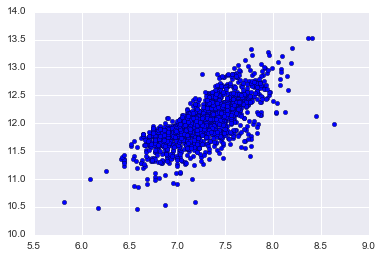

In [221]:
plt.scatter(df_train_final['GrLivArea'], y_train_final);

In [222]:
col_names_scale = df_train_final.columns[df_train_final.max() > 5]

In [223]:
col_names_scale

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [224]:
mean_cols_train = df_train_final.loc[:, col_names_scale].mean()
std_cols_train = df_train_final.loc[:, col_names_scale].std()
df_train_final.loc[:, col_names_scale] = (df_train_final.loc[:, col_names_scale] - mean_cols_train) / std_cols_train

In [225]:
mean_cols_test = df_test_final.loc[:, col_names_scale].mean()
std_cols_test = df_test_final.loc[:, col_names_scale].std()
df_test_final.loc[:, col_names_scale] = (df_test_final.loc[:, col_names_scale] - mean_cols_test) / std_cols_test

In [226]:
X_train_final = df_train_final.values
X_test_final = df_test_final.values

In [227]:
X_train_final.shape, y_train_final.shape

((1460, 349), (1460,))

In [228]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics.scorer import make_scorer

In [229]:
alphas = np.logspace(-3, 1.7, 100)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train_final, y_train_final, cv=10, scoring='mean_squared_error'))
    test_scores.append(np.mean(test_score))

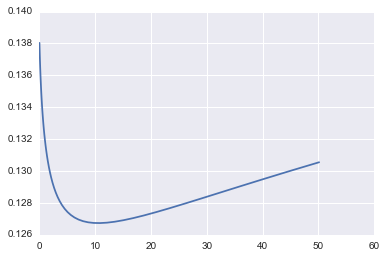

In [230]:
plt.plot(alphas, test_scores);

In [231]:
# min alpha
alphas[np.argmin(test_scores)]

10.848096388007432

In [207]:
import warnings
warnings.filterwarnings("ignore")

In [208]:
gbr = GradientBoostingRegressor()
parameters = {'max_features':[.05], 'n_estimators':[2500, 3000],
             'learning_rate':[.03], 'max_depth': [2]}
clf = GridSearchCV(gbr, parameters, n_jobs=-1, scoring='mean_squared_error')
clf.fit(X_train_final, y_train_final)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2500, 3000], 'learning_rate': [0.03], 'max_depth': [2], 'max_features': [0.05]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [209]:
clf.best_params_

{'learning_rate': 0.03,
 'max_depth': 2,
 'max_features': 0.05,
 'n_estimators': 3000}

In [210]:
clf.grid_scores_

[mean: -0.00011, std: 0.00002, params: {'max_depth': 2, 'learning_rate': 0.03, 'n_estimators': 2500, 'max_features': 0.05},
 mean: -0.00011, std: 0.00002, params: {'max_depth': 2, 'learning_rate': 0.03, 'max_features': 0.05, 'n_estimators': 3000}]

In [211]:
np.sqrt(-clf.grid_scores_[1].mean_validation_score)

0.01035545107722201

In [167]:
gbr = GradientBoostingRegressor()
parameters = {'max_features':[.05], 'n_estimators':[4000],
             'learning_rate':[.025], 'max_depth': [3]}
clf = GridSearchCV(gbr, parameters, n_jobs=-1, scoring='mean_squared_error')
clf.fit(X_train_final, y_train_final)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [4000], 'learning_rate': [0.025], 'max_depth': [3], 'max_features': [0.05]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [168]:
clf.best_params_

{'learning_rate': 0.025,
 'max_depth': 3,
 'max_features': 0.05,
 'n_estimators': 4000}

In [169]:
clf.grid_scores_

[mean: -0.01539, std: 0.00286, params: {'max_depth': 3, 'learning_rate': 0.025, 'max_features': 0.05, 'n_estimators': 4000}]

In [170]:
np.sqrt(-clf.grid_scores_[0].mean_validation_score)

0.12404208767279803

In [212]:
ridge = Ridge(alpha=10)
gbr = GradientBoostingRegressor(learning_rate=.03, max_depth=2, max_features=.05, n_estimators=3000)

In [213]:
ridge.fit(X_train_final, y_train_final)
gbr.fit(X_train_final, y_train_final)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.03, loss='ls',
             max_depth=2, max_features=0.05, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [214]:
y_ridge = np.exp(ridge.predict(X_test_final))
y_gbr = np.exp(gbr.predict(X_test_final))

In [215]:
y_s = pd.DataFrame({'y_ridge':y_ridge, 'y_gbr': y_gbr})

In [216]:
y_s['y_diff'] = np.abs(y_ridge - y_gbr)

In [217]:
y_s.sort_values('y_diff', ascending=False).head(10)

,y_gbr,y_ridge,y_diff
1089,227267.767107,634033.464610,406765.697502
245,281210.680567,436400.089363,155189.408796
514,288618.378244,437689.195972,149070.817728
203,311729.623992,460115.649942,148386.025950
879,417032.084311,321876.796280,95155.288031
728,208031.345325,289140.242500,81108.897175
200,504423.331393,423839.872501,80583.458892
1229,481968.369715,403690.849190,78277.520525
1251,407456.343229,339477.469648,67978.873580
1250,275993.163029,208057.460447,67935.702582


In [218]:
sub_df = pd.DataFrame({'Id': df_house_test.index, 'SalePrice': (y_ridge + y_gbr) / 2})

In [219]:
sub_df.to_csv('../data/submissions/submission22.csv', index=False)

In [182]:
a=gbr.estimators_[0][0]

In [183]:
gbr.feature_importances_.shape

(349,)

In [239]:
fi = pd.Series(index=df_train_final.columns, data=gbr.feature_importances_)

In [243]:
top_cols = fi.sort_values(ascending=False).index.values[:15]

In [185]:
ridge_feat = pd.Series(index=df_train_final.columns, data=ridge.coef_)

In [186]:
ridge_feat.sort_values(ascending=False)

GrLivArea                    0.125249
OverallQual_9                0.107377
Neighborhood_StoneBr         0.085738
Functional_Typ               0.080092
Neighborhood_Crawfor         0.078836
OverallQual_8                0.069265
OverallCond_9                0.067256
FullBath_3                   0.066811
Neighborhood_NridgHt         0.066396
Exterior1st_BrkFace          0.059076
Neighborhood_NoRidge         0.058956
CentralAir                   0.058828
OverallCond_8                0.058377
MSZoning_FV                  0.057040
OverallCond_7                0.056119
KitchenQual_Ex               0.055711
Fireplaces_2                 0.051757
GarageCars                   0.048046
GarageQual_Gd                0.047866
Condition1_Norm              0.044199
MSZoning_RL                  0.043077
Neighborhood_Somerst         0.042760
TotalBsmtSF                  0.041597
TotRmsAbvGrd_10              0.040937
MSZoning_RH                  0.040032
BsmtQual_Ex                  0.039361
OverallQual_

### Calculate Press Statistic

In [233]:
X= X_train_final.copy()

In [283]:
def find_press(lamb):
    hat = np.dot(np.dot(X, np.linalg.pinv(np.dot(X.T, X) + lamb * np.eye(X.shape[1]))), X.T)
    y_pred_hat = np.dot(hat, y_train_final)
    error = y_train_final - y_pred_hat
    hat_diag = hat.diagonal()
    return error / hat_diag

In [285]:
press_ridge = find_press(10)
press_lr = find_press(0)

In [291]:
press_ser = pd.Series(index=df_train_final.index, data=press_ridge)

In [293]:
press_ser[np.abs(press_ridge) > 4]

Id
14      4.125821
463    -4.104819
524    -4.303699
633    -5.701849
875    -4.659054
1325   -7.197355
1454   -4.315564
dtype: float64

In [369]:
press_ser.loc[1012]

-0.67449014169062071

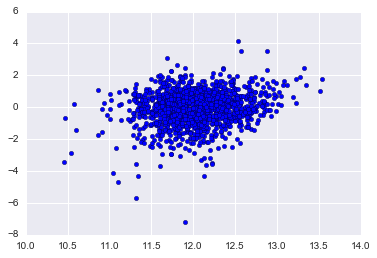

In [287]:
plt.scatter(y_train_final, press_ridge)

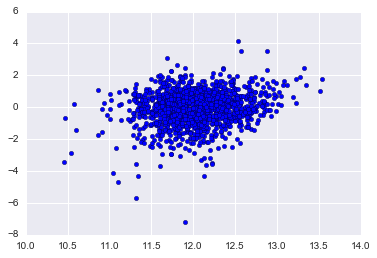

In [288]:
plt.scatter(y_train_final, press)

In [300]:
ridge_coefs = pd.Series(index=df_train_final.columns, data=np.abs(ridge.coef_))

In [361]:
df_house.loc[1325, 'SalePrice'], df_house.loc[633, 'SalePrice']

(147000, 82500)

In [336]:
lasso = Lasso(alpha=.001)

In [337]:
lasso.fit(df_train_final, y_train_final)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

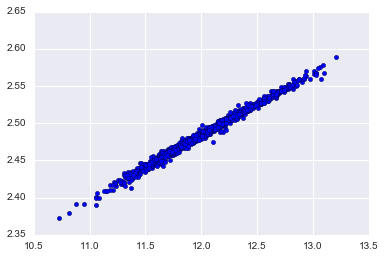

In [338]:
plt.scatter(lasso.predict(df_train_final), ridge.predict(df_train_final))

In [340]:
lasso_coefs = pd.Series(index=df_train_final.columns, data=lasso.coef_)
lasso_coefs = lasso_coefs[lasso_coefs != 0]
lasso_coefs = lasso_coefs.loc[lasso_coefs.abs().order(ascending=False).index]

In [342]:
lasso_coefs.head(30)

MSZoning_C (all)            -0.277089
OverallCond_3               -0.133373
GrLivArea                    0.133024
OverallQual_9                0.112360
Functional_Typ               0.097858
Neighborhood_Crawfor         0.082380
OverallQual_8                0.078448
KitchenQual_Ex               0.067456
SaleCondition_Abnorml       -0.067023
Neighborhood_NridgHt         0.064691
OverallQual_3               -0.064336
OverallCond_4               -0.062626
Neighborhood_StoneBr         0.062350
FullBath_3                   0.061891
CentralAir                   0.060978
BsmtQual_Ex                  0.056207
GarageCars                   0.055786
Neighborhood_Edwards        -0.055628
Exterior1st_BrkFace          0.052830
YearRemodAdd_[1950, 1960]   -0.051041
KitchenAbvGr                -0.050544
Condition1_Norm              0.050280
Neighborhood_NoRidge         0.049924
OverallQual_4               -0.048169
ExterCond_Fa                -0.044870
Neighborhood_Somerst         0.043710
BsmtExposure

In [351]:
orig_lasso_var = lasso_coefs.index.str.split('_').str.get(0).unique()

In [370]:
df_house.loc[633, orig_lasso_var]

MSZoning              RL
OverallCond            5
GrLivArea           1411
OverallQual            7
Functional           Typ
Neighborhood      NWAmes
KitchenQual           TA
SaleCondition     Family
FullBath               2
CentralAir             Y
BsmtQual              TA
GarageCars             2
Exterior1st      Plywood
YearRemodAdd        1977
KitchenAbvGr           1
Condition1          Norm
ExterCond             Gd
BsmtExposure          No
MSSubClass            20
LotArea            11900
HeatingQC             TA
ExterQual             TA
YearBuilt           1977
LandContour          Lvl
Fireplaces             1
GarageYrBlt         1977
TotalBsmtSF         1386
1stFlrSF            1411
BsmtFinSF1           822
HalfBath               0
Foundation        CBlock
TotRmsAbvGrd           6
LotConfig         Inside
BsmtFinType1         ALQ
GarageQual            TA
SaleType              WD
BsmtFullBath           0
ScreenPorch            0
BedroomAbvGr           3
MoSold                 4


In [380]:
df_house.loc[df_house['OverallQual'] == 7].groupby('OverallCond')['SalePrice'].mean()

OverallCond
3    197000
4    172166
5    208027
6    205423
7    213999
8    195368
9    214266
Name: SalePrice, dtype: int64

In [372]:
df_house.groupby(['OverallQual', 'MSZoning'])['SalePrice'].mean()

OverallQual  MSZoning
1            RL           50150
2            C (all)      35311
             RL           60000
             RM           60000
3            C (all)      83000
             RH           79000
             RL           85166
             RM           96495
4            C (all)      70815
             RH           94500
             RL          117627
             RM           95122
5            C (all)      55993
             RH          143055
             RL          138003
             RM          114977
6            C (all)     133900
             FV          181053
             RH          140933
             RL          169641
             RM          127431
7            FV          196616
             RH          133000
             RL          213831
             RM          163828
8            FV          250776
             RL          279381
             RM          225583
9            FV          349889
             RL          368372
10           FV   

In [373]:
df_house.loc[633, 'SalePrice']

82500

In [190]:
# press
y_train_pred = ridge.predict(X_train_final)
y_train_pred = gbr.predict(X_train_final)

In [191]:
mse = np.sqrt(np.mean((y_train_final - y_train_pred)**2))

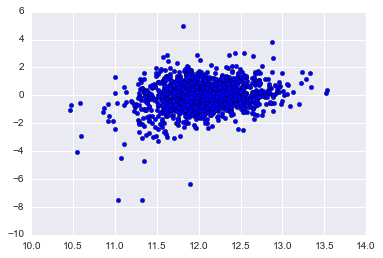

In [192]:
plt.scatter(y_train_final, (y_train_final - y_train_pred) / mse)

In [193]:
import seaborn as sns

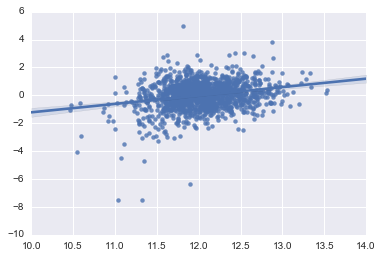

In [194]:
sns.regplot(y_train_final, (y_train_final - y_train_pred) / mse)